In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
path='C:\\Users\\user\\Downloads\\myfolder\\udemy'
comp_list=['AAPL_data.csv','AMZN_data.csv','GOOG_data.csv','MSFT_data.csv']
all_data=pd.DataFrame()
for file in comp_list:
    current_df=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_df])
all_data.shape

(4752, 7)

In [73]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [74]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [75]:
all_data['date']=pd.to_datetime(all_data['date'])

In [76]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

# Analyze closing price of all stocks

In [77]:
tech_list=all_data['Name'].unique()
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

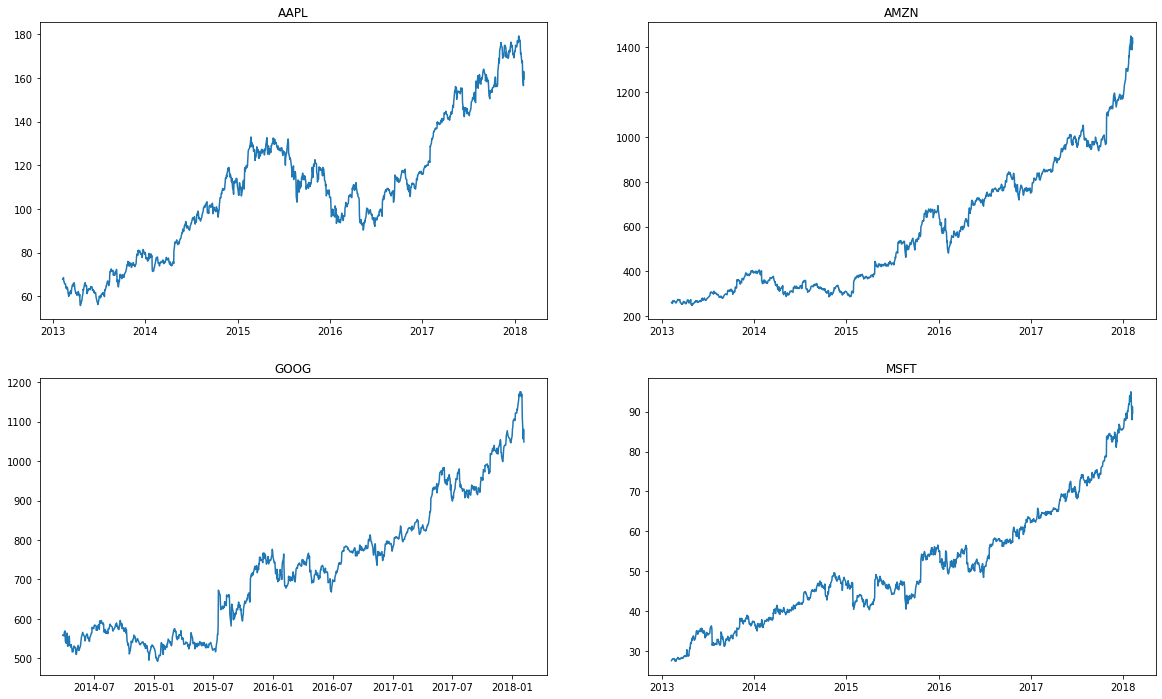

In [78]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

For apple in 2016 the stock price got lower then it went up
But in microsoft the stock price was showing kind of exponential.

# Analyze total volume of stock being trade everyday

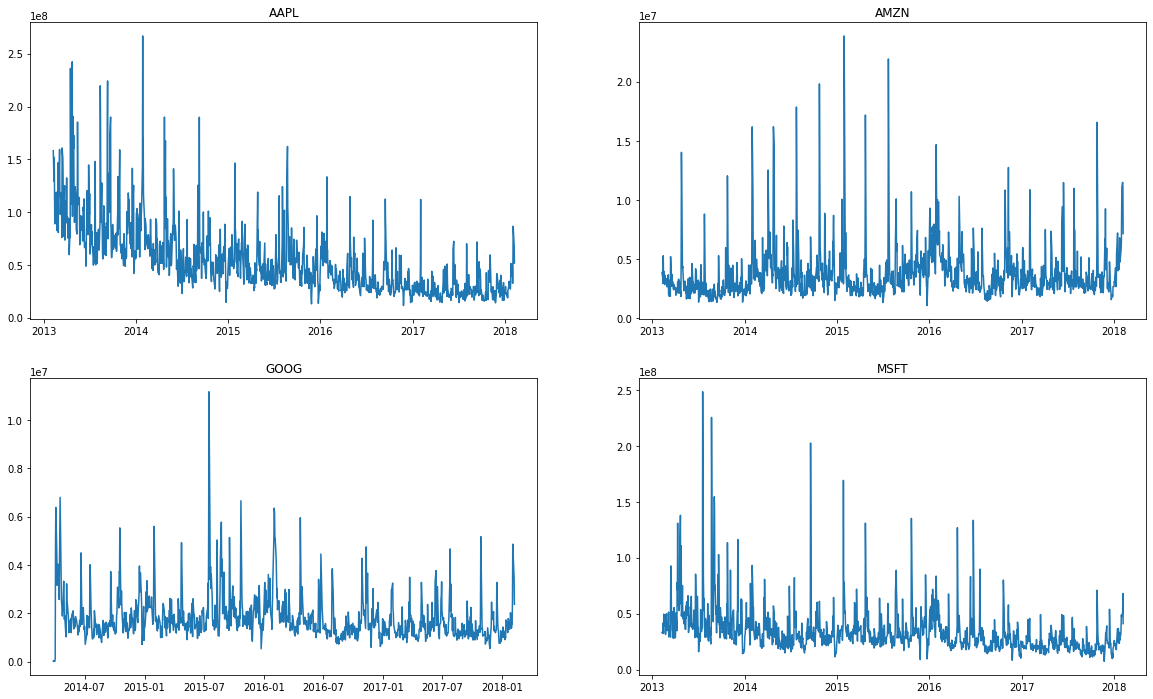

In [79]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)

# analyse Daily price change in stock

In [80]:
df=pd.read_csv('C:\\Users\\user\\Downloads\\myfolder\\udemy/AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [81]:
df['daily_price_change']=df['close']-df['open']
df.head()

,date,open,high,low,close,volume,Name,daily_price_change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [82]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100
df.head()

,date,open,high,low,close,volume,Name,daily_price_change,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [83]:
import plotly.express as px

In [85]:
fig=px.line(df,x='date',y='1day % return',title=company)
fig.show()

#### Using matplotlib for visualization

<AxesSubplot:>

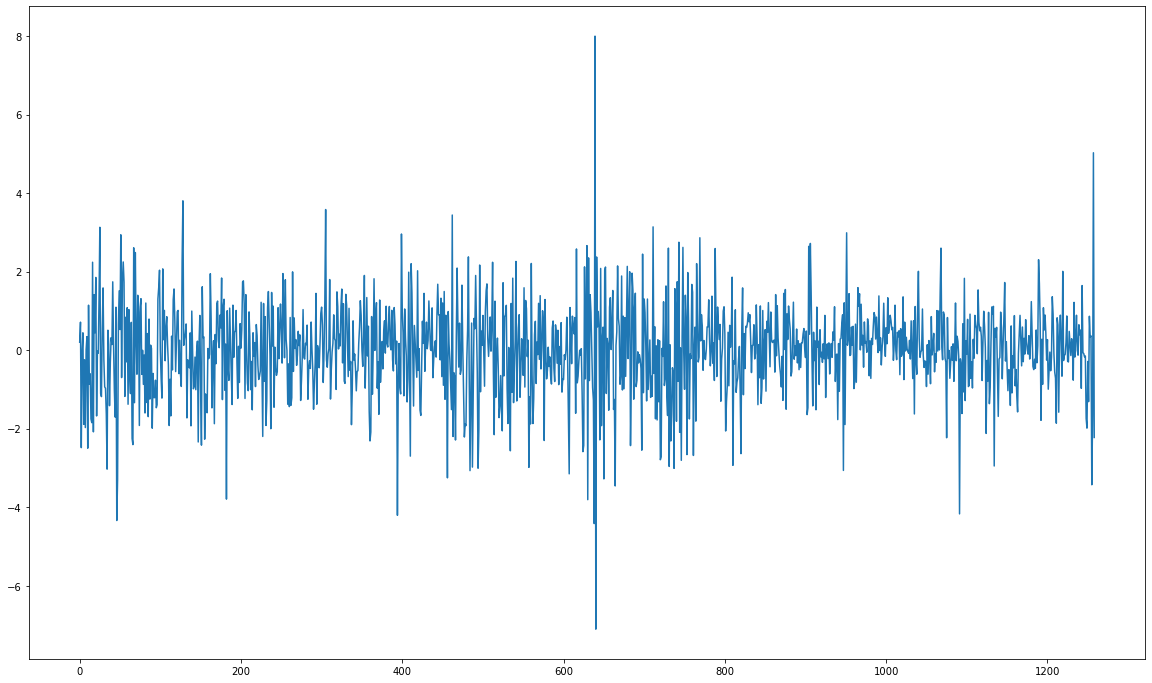

In [86]:
plt.figure(figsize=(20,12))
df['1day % return'].plot()

#### Show between date intervals

<AxesSubplot:xlabel='date'>

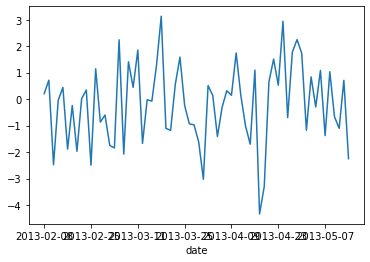

In [87]:
df.set_index('date')['2013-02-08':'2013-05-14']['1day % return'].plot()

# Analyze monthly mean of closing feature

In [104]:
df2=df.copy()
df2.head()

,date,open,high,low,close,volume,Name,daily_price_change,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [105]:
df2.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
daily_price_change    float64
1day % return         float64
dtype: object

In [106]:
df2['date']=pd.to_datetime(df2['date'])
df2.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
daily_price_change           float64
1day % return                float64
dtype: object

In [108]:
df2.set_index('date',inplace=True)
df2.head()

,open,high,low,close,volume,Name,daily_price_change,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [109]:
df2['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<AxesSubplot:xlabel='date'>

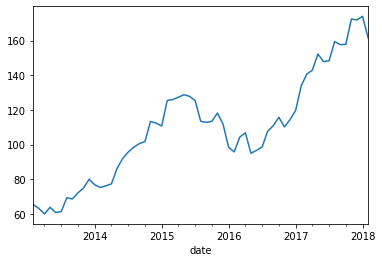

In [110]:
df2['close'].resample('M').mean().plot()

In [111]:
df2['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

After 2016 the mean value increased

<AxesSubplot:xlabel='date'>

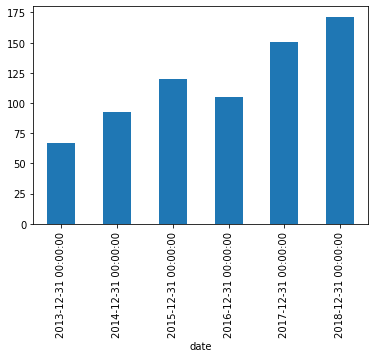

In [112]:
df2['close'].resample('Y').mean().plot(kind='bar')

# Checking if the Stock prices of these tech companies(Amazon,Apple,Google,Microsoft) are correlated

In [113]:
aapl=pd.read_csv('C:\\Users\\user\\Downloads\\myfolder\\udemy/AAPL_data.csv')
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [114]:
goog=pd.read_csv('C:\\Users\\user\\Downloads\\myfolder\\udemy/GOOG_data.csv')
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [115]:
amzn=pd.read_csv('C:\\Users\\user\\Downloads\\myfolder\\udemy/AMZN_data.csv')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [116]:
msft=pd.read_csv('C:\\Users\\user\\Downloads\\myfolder\\udemy/MSFT_data.csv')
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [117]:
#create blanck dataframe
close=pd.DataFrame()

In [118]:
close['aapl']=aapl['close']
close['goog']=goog['close']
close['amzn']=amzn['close']
close['msft']=msft['close']

In [119]:
close.head()

,aapl,goog,amzn,msft
0,67.8542,558.46,261.95,27.55
1,68.5614,559.99,257.21,27.86
2,66.8428,556.97,258.70,27.88
3,66.7156,567.16,269.47,28.03
4,66.6556,567.00,269.24,28.04


Multi-variate Analysis

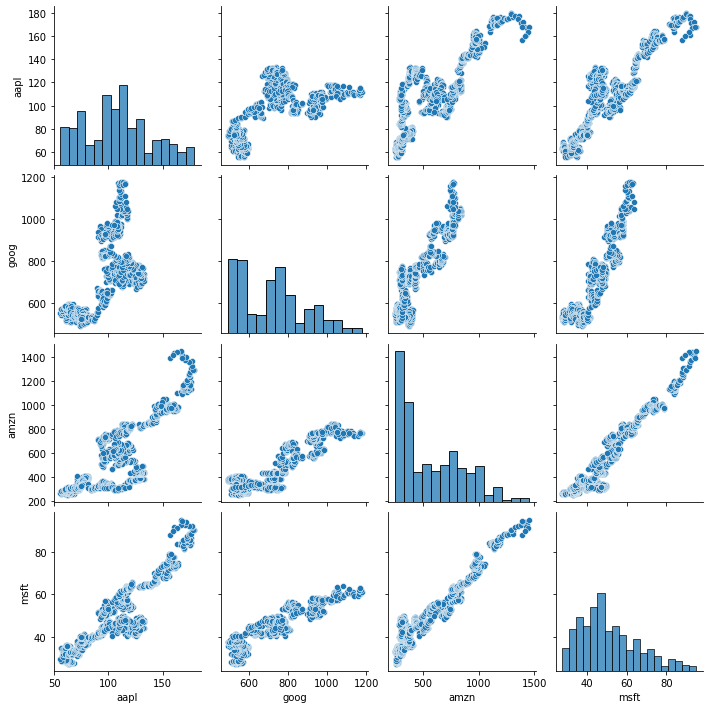

In [120]:
sns.pairplot(data=close)

<AxesSubplot:>

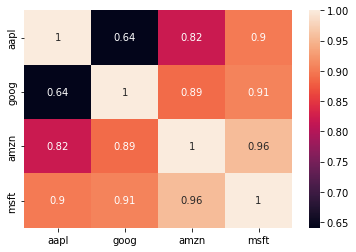

In [121]:
sns.heatmap(close.corr(),annot=True)

From above we can see there are chances when amazon price increases microsoft price is also increased.
Closing price of Google and Microsoft are well correlated

# Analyse Daily return of each stock & how they are co-related

In [122]:
data=pd.DataFrame()

In [123]:
data['appl_change']=((aapl['close']-aapl['open'])/aapl['close'])*100
data['goog_change']=((goog['close']-goog['open'])/goog['close'])*100
data['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data['msft_change']=((msft['close']-msft['open'])/msft['close'])*100

In [124]:
data.head()

,appl_change,goog_change,amzn_change,msft_change
0,0.206325,-1.708269,0.209964,0.725953
1,0.714688,-0.216075,-2.328836,0.753769
2,-2.481344,-1.781065,-0.189409,0.000000
3,-0.042869,1.489879,2.946525,0.356761
4,0.443624,0.334039,0.694548,0.427960


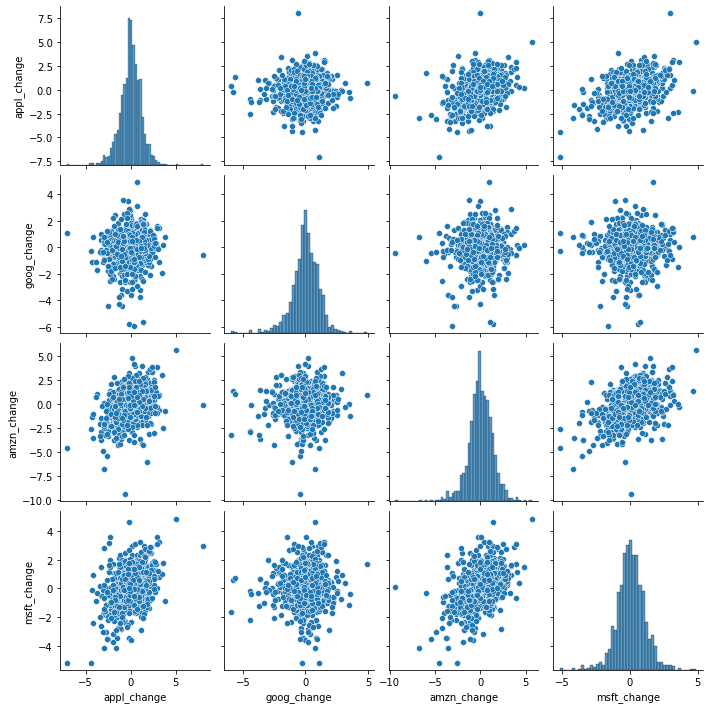

In [125]:
sns.pairplot(data=data)

<AxesSubplot:>

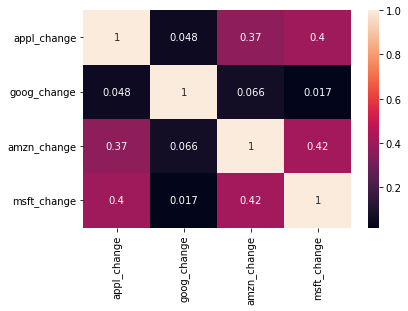

In [126]:
sns.heatmap(data.corr(),annot=True)

Here we can see Amazon and microsoft have good correlation on daily returns